In [75]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [76]:
import numpy as np
import pandas as pd
import datetime as dt

In [77]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [78]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [79]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [80]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [81]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [82]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [83]:
# Close session
session.close()

In [ ]:
# Exploratory Precipitation Analysis

In [84]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year_ago = (pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)).strftime('%Y-%m-%d')
# Perform a query to retrieve the data and precipitation scores
P_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).\
    filter(Measurement.date <= most_recent_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
P_data_df = pd.DataFrame(P_data, columns=['date', 'Precipitation'])
P_data_df.set_index('date', inplace=True)

P_data_df=P_data_df.sort_values(by='date').dropna()
P_data_df.head()

,Precipitation
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


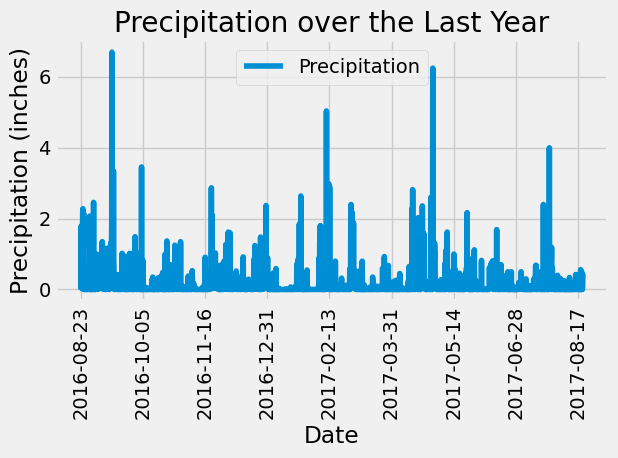

In [94]:
# Plot the results
P_data_df.plot(title='Precipitation over the Last Year', ylabel='Precipitation (inches)', xlabel='Date')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [95]:
# Use Pandas to calculate the summary statistics for the precipitation data
P_data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Exploratory Station Analysis

In [96]:
# Design a query to calculate the total number of stations in the dataset
Station_count = session.query(func.count(Station.station)).scalar()
Station_count

9

In [97]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [98]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Station_Number = 'USC00519281'
session.query(func.min(Measurement.tobs), 
              func.max(Measurement.tobs), 
              func.avg(Measurement.tobs)).filter(Measurement.station == Station_Number).all()

[(54.0, 85.0, 71.66378066378067)]

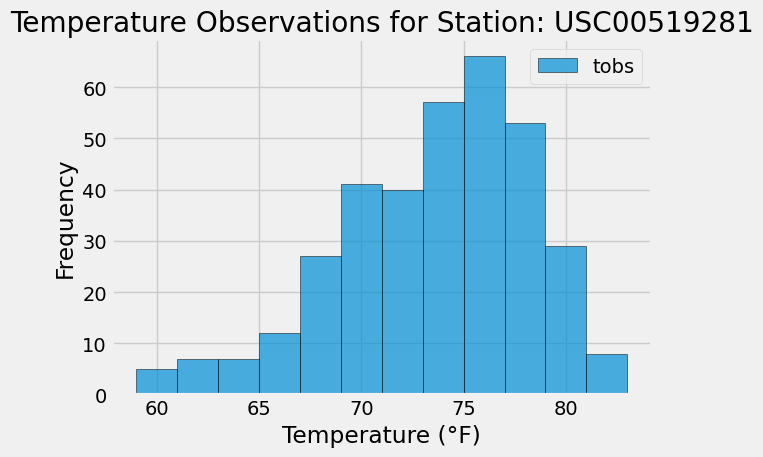

In [99]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Highest_Station = Active_stations[0][0]

Data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").\
    filter(Measurement.station == Highest_Station).all()

# create data frame
Data_df = pd.DataFrame(Data)

# Plot the histogram
Data_df.plot.hist(bins=12, alpha=0.7, edgecolor='black', title='Temperature Observations for Station: ' + Highest_Station)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

       

In [100]:
# Close session
session.close()